### Here, I will train an Isolation Forest model on the three datasets created in FeatureEngineering.ipynb
####  The functions used to train and plot the isolation forests can be found in the scripts folder 

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import sys
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# SCRIPTS
sys.path.append(os.path.abspath(".."))
from scripts import conversions, isolation_forest, plots

### Reading in the datasets

In [2]:
df_full_transactions = pd.read_csv('../data/large/modified_full_transactions.csv')
df_transaction_rate = pd.read_csv('../data/small/transaction_rate.csv')
df_wash_trading = pd.read_csv('../data/small/wash_trading.csv')

### 1. Training on the full dataset with additional features

In [3]:
df_full_transactions

,hash,sender,recipient,value,gas_used,gas_price,timestamp,value_zscore,value_gas_ratio
0,0x06dc5006e9cc13418808a35b5a6fb91378eb78c236db...,0x675bB023e268dCC43F543620577bCacB73047f08,0x5dC62cea20B0E7c3607aDCc61a885Ff9369dbc60,0.000000,223837,180.411926,2025-02-14 10:16:10,-0.011788,0.000000
1,0x689d1453646e621d664836655d869d7301b8c7bcd1d4...,0x1ba98272731f1Ab5cC33a02F88694C39916E26dF,0x51C72848c68a965f66FA7a88855F9f7784502a7F,0.000000,153985,81.237520,2025-02-14 10:16:10,-0.011788,0.000000
2,0x3057779542c82c2ae3f1b52b6739afe82719a61ad26c...,0x5d1783ddbb657fdf6FcC2eF5B6796Ac0DdeEb6e3,0x68d3A973E7272EB388022a5C6518d9b2a2e66fBf,0.000000,223550,65.091946,2025-02-14 10:16:11,-0.011788,0.000000
3,0x0c664ea5c27efb322c1dc20c2a830b97a33fbd82b027...,0x3f22f60936F4f5D1E96cEdEb44beE66d0Cd7c220,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,0.000000,500002,63.063619,2025-02-14 10:16:11,-0.011788,0.000000
4,0x1b386bb2f08f57a5287640e09e2f3640798a58d69a3a...,0x24f7eF98522dd61D529464f67BB3ffe96eA8AFC2,0x5dC62cea20B0E7c3607aDCc61a885Ff9369dbc60,0.000000,252997,47.995919,2025-02-14 10:16:11,-0.011788,0.000000
...,...,...,...,...,...,...,...,...,...
1000460,0x8cbf01dc0bbebe854a64ccd7e9ccee8876c95ee30cfb...,0x5698D4ec03802438Bce268b02eb3817B8C3C2b3f,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,45758,1.919426,2025-02-17 06:06:35,-0.011788,0.000000
1000461,0xb0fac9da7e21836663a05e8bcfd429a64e66160f10d7...,0x5baBE600b9fCD5fB7b66c0611bF4896D967b23A1,0xf45AFF520a8Ebe59f513719fc78b164e375Dd1f4,0.007562,21000,1.917395,2025-02-17 06:06:35,-0.011718,0.003944
1000462,0x488d4e454120b061f3a0c41008b90d1156737845d91a...,0x99719eacc100BD48D4dbEb96E990333a7601e5B8,0x65c55F33F9493E8702FEea89B4fA357283eD3841,0.000000,302687,1.917395,2025-02-17 06:06:35,-0.011788,0.000000
1000463,0xcdda18972b9baf4310ce4be72d1ec91dc32bb2f02c6b...,0x6a0913BA185848c09250D3F40DFf29dC45530978,0xb965602E41Af7A92B3F4b48729736Aded9C94E47,0.000000,500000,1.913384,2025-02-17 06:06:35,-0.011788,0.000000


### Lets first try with just the `value` feature so we can get a visual of how Isolation Forest clusters

Number of anomalies flagged: 974
Number of unflagged points: 999491


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


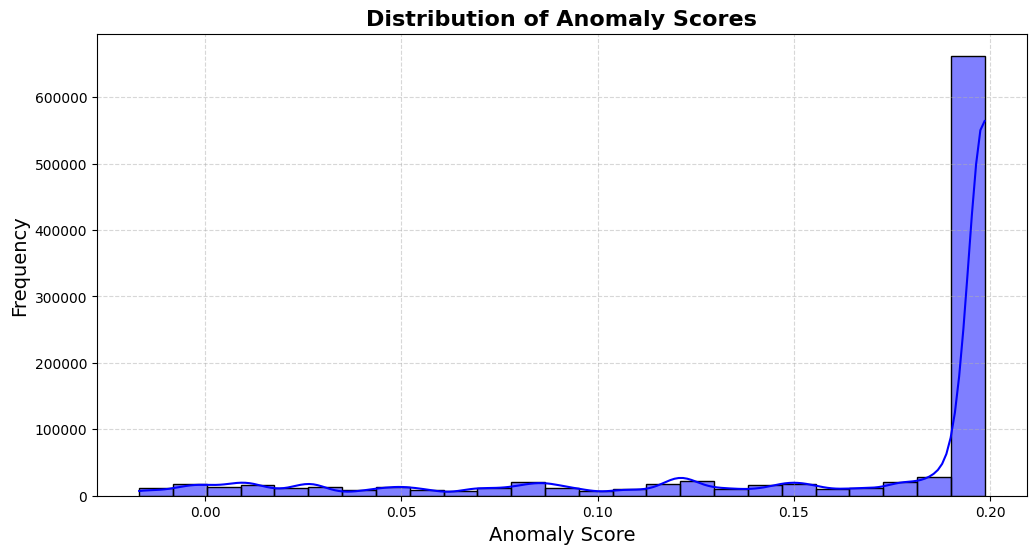

Min: -0.016817920656080787
Max: 0.19857296265256819
Mean: 0.16274321665871494
Std Dev: 0.06184142395314464


In [4]:
df_full_transactions_clustered, pipe = isolation_forest.train_isolation_forest(df_full_transactions, 
                                                                         features=['value'], 
                                                                         n_estimators=100, 
                                                                         contamination=.001) # Lets start with 1% anomalies

In [5]:
df_full_transactions_clustered

,hash,sender,recipient,value,gas_used,gas_price,timestamp,value_zscore,value_gas_ratio,anomaly_score
0,0x06dc5006e9cc13418808a35b5a6fb91378eb78c236db...,0x675bB023e268dCC43F543620577bCacB73047f08,0x5dC62cea20B0E7c3607aDCc61a885Ff9369dbc60,0.000000,223837,180.411926,2025-02-14 10:16:10,-0.011788,0.000000,1
1,0x689d1453646e621d664836655d869d7301b8c7bcd1d4...,0x1ba98272731f1Ab5cC33a02F88694C39916E26dF,0x51C72848c68a965f66FA7a88855F9f7784502a7F,0.000000,153985,81.237520,2025-02-14 10:16:10,-0.011788,0.000000,1
2,0x3057779542c82c2ae3f1b52b6739afe82719a61ad26c...,0x5d1783ddbb657fdf6FcC2eF5B6796Ac0DdeEb6e3,0x68d3A973E7272EB388022a5C6518d9b2a2e66fBf,0.000000,223550,65.091946,2025-02-14 10:16:11,-0.011788,0.000000,1
3,0x0c664ea5c27efb322c1dc20c2a830b97a33fbd82b027...,0x3f22f60936F4f5D1E96cEdEb44beE66d0Cd7c220,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,0.000000,500002,63.063619,2025-02-14 10:16:11,-0.011788,0.000000,1
4,0x1b386bb2f08f57a5287640e09e2f3640798a58d69a3a...,0x24f7eF98522dd61D529464f67BB3ffe96eA8AFC2,0x5dC62cea20B0E7c3607aDCc61a885Ff9369dbc60,0.000000,252997,47.995919,2025-02-14 10:16:11,-0.011788,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
1000460,0x8cbf01dc0bbebe854a64ccd7e9ccee8876c95ee30cfb...,0x5698D4ec03802438Bce268b02eb3817B8C3C2b3f,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0.000000,45758,1.919426,2025-02-17 06:06:35,-0.011788,0.000000,1
1000461,0xb0fac9da7e21836663a05e8bcfd429a64e66160f10d7...,0x5baBE600b9fCD5fB7b66c0611bF4896D967b23A1,0xf45AFF520a8Ebe59f513719fc78b164e375Dd1f4,0.007562,21000,1.917395,2025-02-17 06:06:35,-0.011718,0.003944,1
1000462,0x488d4e454120b061f3a0c41008b90d1156737845d91a...,0x99719eacc100BD48D4dbEb96E990333a7601e5B8,0x65c55F33F9493E8702FEea89B4fA357283eD3841,0.000000,302687,1.917395,2025-02-17 06:06:35,-0.011788,0.000000,1
1000463,0xcdda18972b9baf4310ce4be72d1ec91dc32bb2f02c6b...,0x6a0913BA185848c09250D3F40DFf29dC45530978,0xb965602E41Af7A92B3F4b48729736Aded9C94E47,0.000000,500000,1.913384,2025-02-17 06:06:35,-0.011788,0.000000,1


498         499.440000
2405       3627.000000
5206        243.223332
5488        199.999354
5552       3626.998570
              ...     
995891     2659.000000
996159      190.485908
998126      799.778527
998281      399.889300
1000441    2796.000000
Name: value, Length: 974, dtype: float64


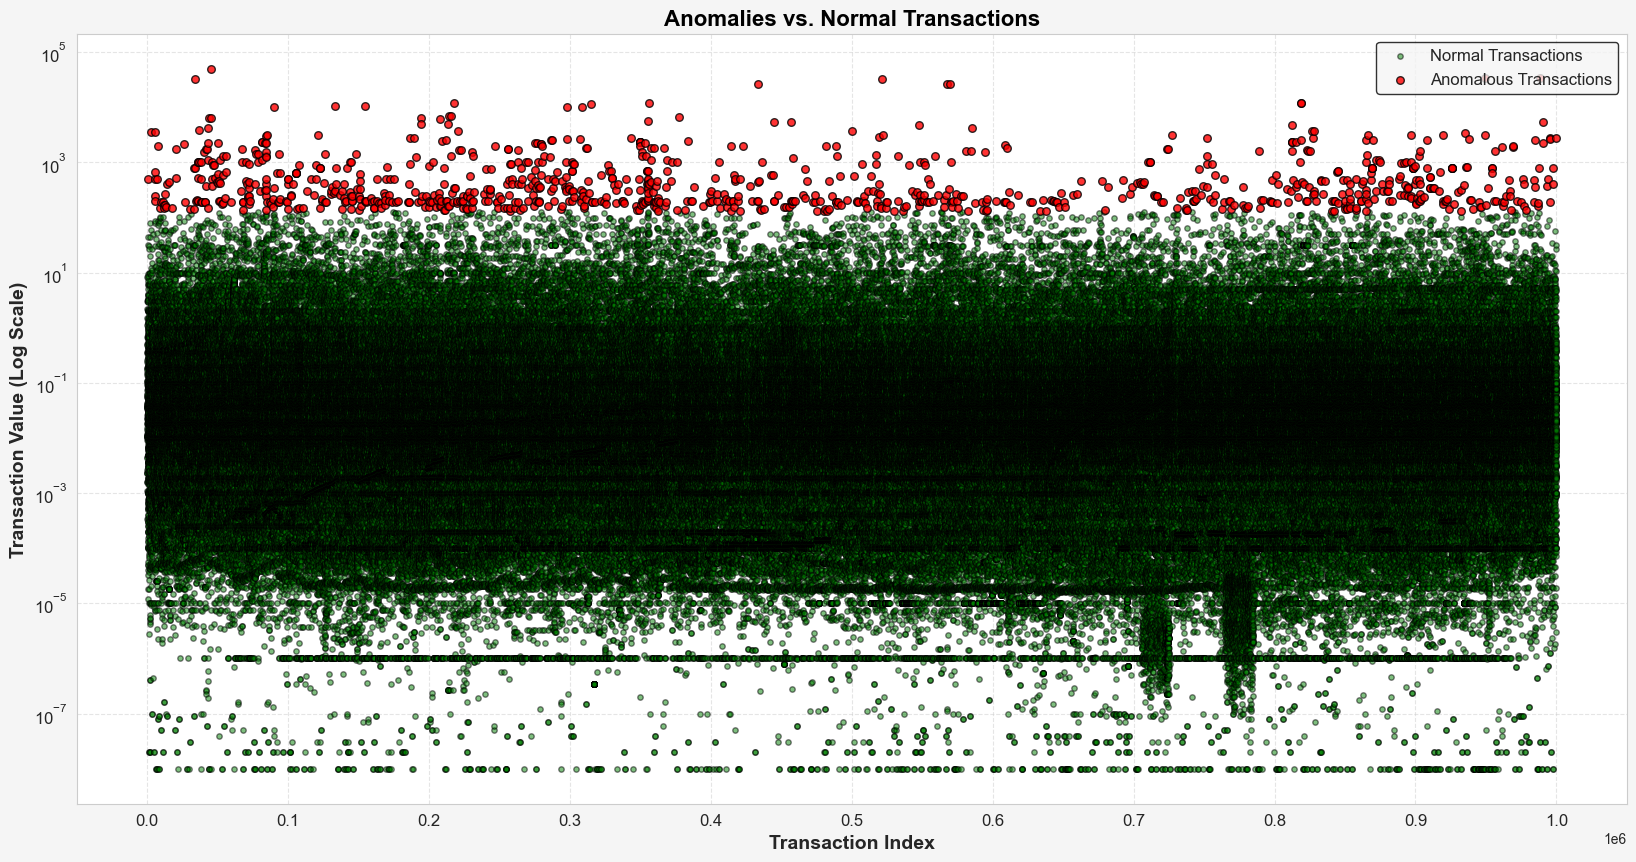

In [6]:
plots.scatter_plot_anomalies(df_full_transactions_clustered)

A clear boundy was made based on the value of the transaction hitting about 100 ETH. Adjusting the contamination hyperparameter will directly increase or decrease this boundry line

Lets train with the `gas_ratio` feature as well.

Number of anomalies flagged: 817
Number of unflagged points: 999648


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


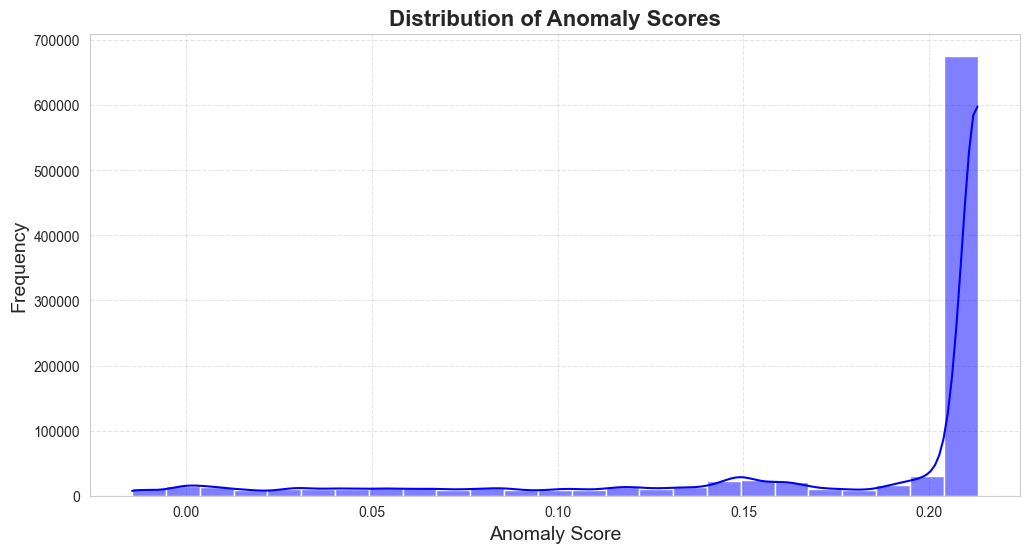

Min: -0.014473941494909881
Max: 0.21298486385327198
Mean: 0.17858731268704295
Std Dev: 0.061732545926138166


In [7]:
df_full_transactions_clustered, pipe = isolation_forest.train_isolation_forest(df_full_transactions, 
                                                                         features=['value', 'value_gas_ratio'], 
                                                                         n_estimators=100, 
                                                                         contamination=.001) # Lets start with 1% anomalies

498         499.440000
2405       3627.000000
5206        243.223332
5488        199.999354
5552       3626.998570
              ...     
995891     2659.000000
996159      190.485908
998126      799.778527
998281      399.889300
1000441    2796.000000
Name: value, Length: 817, dtype: float64


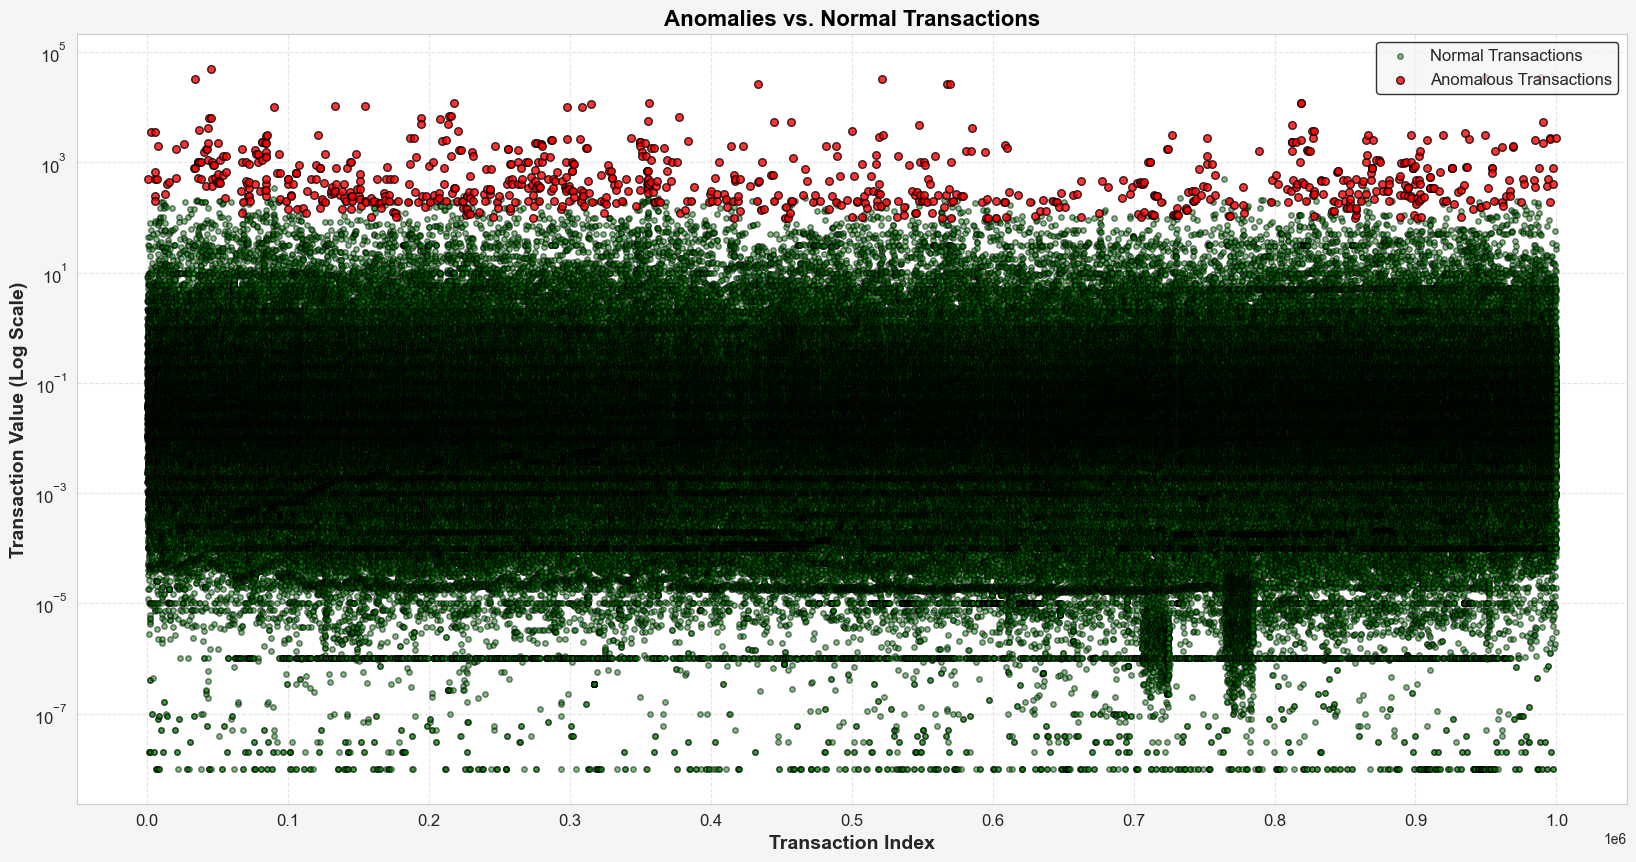

In [8]:
plots.scatter_plot_anomalies(df_full_transactions_clustered)

Interestingly enough, the number of anomalies went down with the addition of this feature

### 2. Training on the transaction rate dataset.

In [9]:
df_transaction_rate

,sender,transaction_hour,total_transactions,total_value
0,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-17 05,231,34798.113190
1,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-14 11,243,34624.889273
2,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-17 04,255,34338.945832
3,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-16 18,120,33111.253746
4,0x9C19B0497997Fe9E75862688a295168070456951,2025-02-16 15,8,26259.513566
...,...,...,...,...
16124,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 02,16,0.000000
16125,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 03,21,0.000000
16126,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 04,10,0.000000
16127,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 05,17,0.000000


Number of anomalies flagged: 17
Number of unflagged points: 16112


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


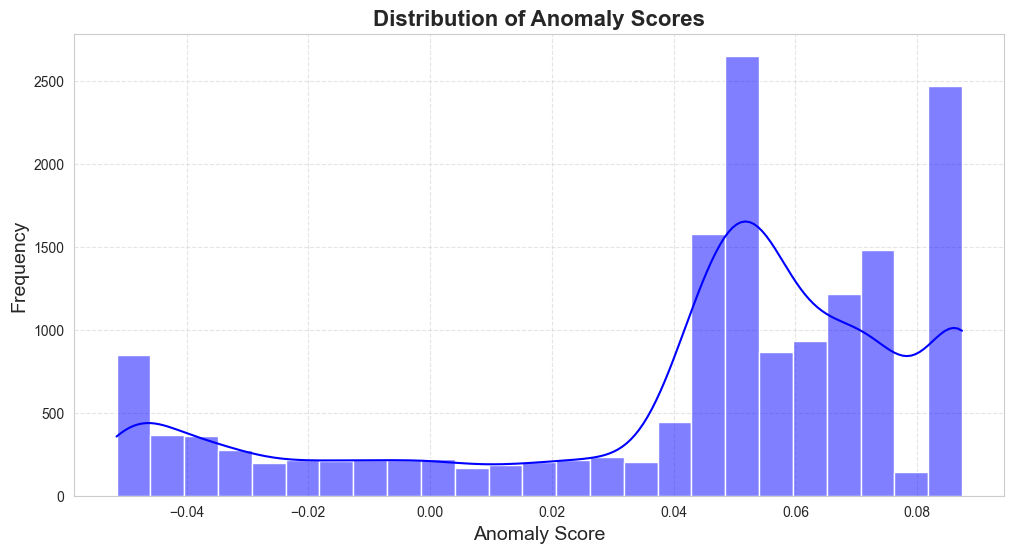

Min: -0.05149723130212691
Max: 0.08735799122264964
Mean: 0.04203663910668718
Std Dev: 0.04043600056665989


,sender,transaction_hour,total_transactions,total_value,anomaly_score
0,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-17 05,231,34798.113190,-1
1,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-14 11,243,34624.889273,-1
2,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-17 04,255,34338.945832,-1
3,0x28C6c06298d514Db089934071355E5743bf21d60,2025-02-16 18,120,33111.253746,-1
4,0x9C19B0497997Fe9E75862688a295168070456951,2025-02-16 15,8,26259.513566,-1
...,...,...,...,...,...
16124,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 02,16,0.000000,1
16125,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 03,21,0.000000,1
16126,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 04,10,0.000000,1
16127,0xff8Ba4D1fC3762f6154cc942CCF30049A2A0cEC6,2025-02-17 05,17,0.000000,1


In [10]:
df_transaction_rate_clustered, pipe = isolation_forest.train_isolation_forest(df_transaction_rate,
                                                                        ['total_transactions', 'total_value'],
                                                                        n_estimators=1000,
                                                                        contamination=.001)
df_transaction_rate_clustered

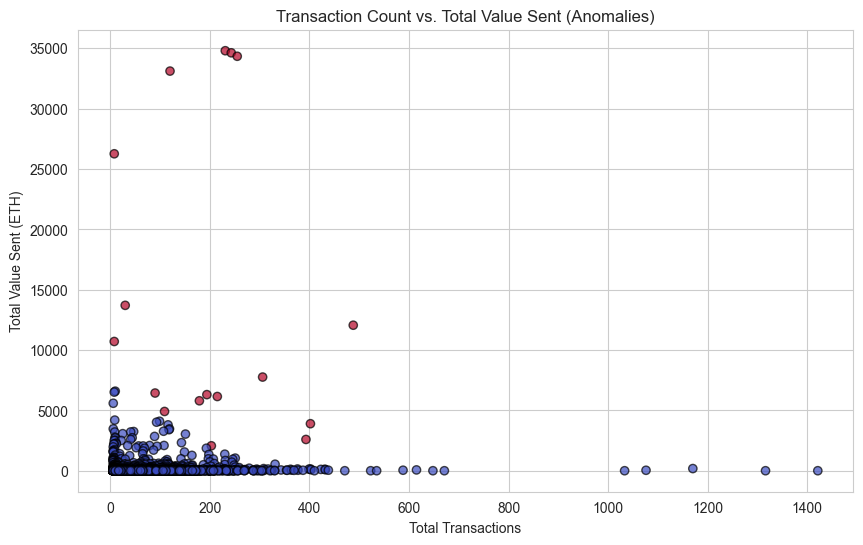

In [11]:
flagged = df_transaction_rate_clustered['anomaly_score'] == -1
x_axis = df_transaction_rate_clustered['total_transactions']
y_axis = df_transaction_rate_clustered['total_value']


plots.transaction_outlier_plot(flagged_data=flagged,
                               x_axis=x_axis,
                               y_axis=y_axis)

There are some pretty high value transactions getting through here; lets increase contamination

Number of anomalies flagged: 162
Number of unflagged points: 15967


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


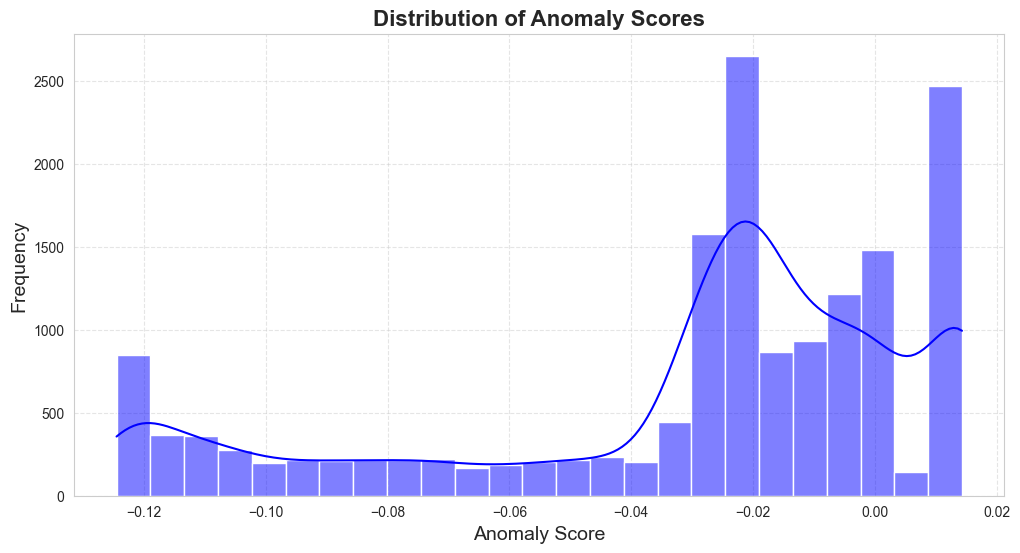

Min: -0.12452193196293526
Max: 0.014333290561841294
Mean: -0.030988061554121173
Std Dev: 0.04043600056665989


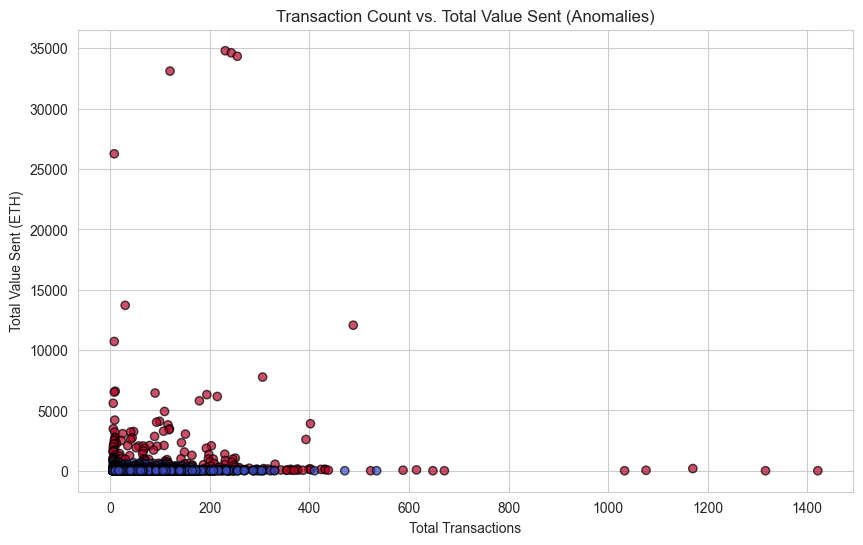

In [13]:
df_transaction_rate_clustered, pipe = isolation_forest.train_isolation_forest(df_transaction_rate,
                                                                        ['total_transactions', 'total_value'],
                                                                        n_estimators=1000,
                                                                        contamination=.01)
flagged = df_transaction_rate_clustered['anomaly_score'] == -1
x_axis = df_transaction_rate_clustered['total_transactions']
y_axis = df_transaction_rate_clustered['total_value']

plots.transaction_outlier_plot(flagged_data=flagged,
                               x_axis=x_axis,
                               y_axis=y_axis)

### 3. Finally, lets do the same thing with `wash_trading.csv`

In [14]:
df_wash_trading

,sender_addr,recipient_addr,total_transactions,total_sent,total_received
0,0x6d42aAb8B4EFd1AD0C5454a040B59Ae3c99440B5,0x6d42aAb8B4EFd1AD0C5454a040B59Ae3c99440B5,46,1380.460000,1380.460000
1,0x00001b0bcca9BC88774000692DEf9Dd6452afb9F,0x00001b0bcca9BC88774000692DEf9Dd6452afb9F,42,58.277158,58.275502
2,0x01cc0bDC248a2916EFB0e39F28aAd2ae3D21be09,0xB74A3fbB5B8BF6607f236c53FB5eE4d2ed536b51,35,0.083212,0.082989
3,0x004c1Bf2F642249a683B850FcE63dDC1c94e836c,0x3c10d28469b918e89e0506cf4fc549dc8a889e1C,10,0.000100,0.000100
4,0x01Ff4825C1f8e902A6aB0F2F28195004Da1E86D6,0x809caa6F8b360BeEe8B4340Ff5Af41fE13873495,10,0.000100,0.000100
...,...,...,...,...,...
1302,0xb0b5B1F7048488D2C974b5d438083F47f397e575,0x1f3Bf5652cDb0aeFcf897F3aE97039614C636916,4,0.000040,0.000040
1303,0xc3a7494837748B23eEE68FA4c894a9c37F68003a,0x07570087D0eD0442e66Be444f3043Bcd9C78F01E,4,0.000040,0.000040
1304,0xda5f693487b7e9450380fF7aAEF07EFb9520b0Ad,0xda5f693487b7e9450380fF7aAEF07EFb9520b0Ad,4,0.004000,0.004000
1305,0xf03fCAF811e112467964684c1C6569e89562323f,0x1B52BeAEf0b3a9c5ed9C5319eBffB5673455a5a4,4,0.000040,0.000040


Number of anomalies flagged: 63
Number of unflagged points: 1244


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


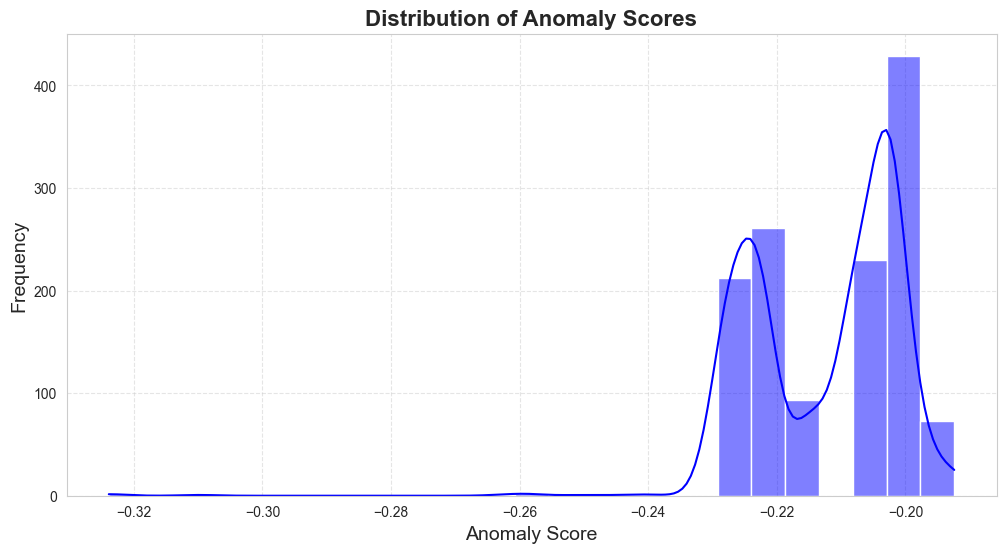

Min: -0.32389317620457747
Max: -0.1924047901684649
Mean: -0.21260182882657028
Std Dev: 0.011973478832233115


,sender_addr,recipient_addr,total_transactions,total_sent,total_received,anomaly_score
0,0x6d42aAb8B4EFd1AD0C5454a040B59Ae3c99440B5,0x6d42aAb8B4EFd1AD0C5454a040B59Ae3c99440B5,46,1380.460000,1380.460000,-1
1,0x00001b0bcca9BC88774000692DEf9Dd6452afb9F,0x00001b0bcca9BC88774000692DEf9Dd6452afb9F,42,58.277158,58.275502,-1
2,0x01cc0bDC248a2916EFB0e39F28aAd2ae3D21be09,0xB74A3fbB5B8BF6607f236c53FB5eE4d2ed536b51,35,0.083212,0.082989,-1
3,0x004c1Bf2F642249a683B850FcE63dDC1c94e836c,0x3c10d28469b918e89e0506cf4fc549dc8a889e1C,10,0.000100,0.000100,1
4,0x01Ff4825C1f8e902A6aB0F2F28195004Da1E86D6,0x809caa6F8b360BeEe8B4340Ff5Af41fE13873495,10,0.000100,0.000100,1
...,...,...,...,...,...,...
1302,0xb0b5B1F7048488D2C974b5d438083F47f397e575,0x1f3Bf5652cDb0aeFcf897F3aE97039614C636916,4,0.000040,0.000040,-1
1303,0xc3a7494837748B23eEE68FA4c894a9c37F68003a,0x07570087D0eD0442e66Be444f3043Bcd9C78F01E,4,0.000040,0.000040,-1
1304,0xda5f693487b7e9450380fF7aAEF07EFb9520b0Ad,0xda5f693487b7e9450380fF7aAEF07EFb9520b0Ad,4,0.004000,0.004000,-1
1305,0xf03fCAF811e112467964684c1C6569e89562323f,0x1B52BeAEf0b3a9c5ed9C5319eBffB5673455a5a4,4,0.000040,0.000040,-1


In [15]:
df_wash_trading_clustered, pipe = isolation_forest.train_isolation_forest(df_wash_trading,
                                                                        ['total_transactions', 'total_sent'],
                                                                        n_estimators=1000,
                                                                        contamination=.05)
df_wash_trading_clustered

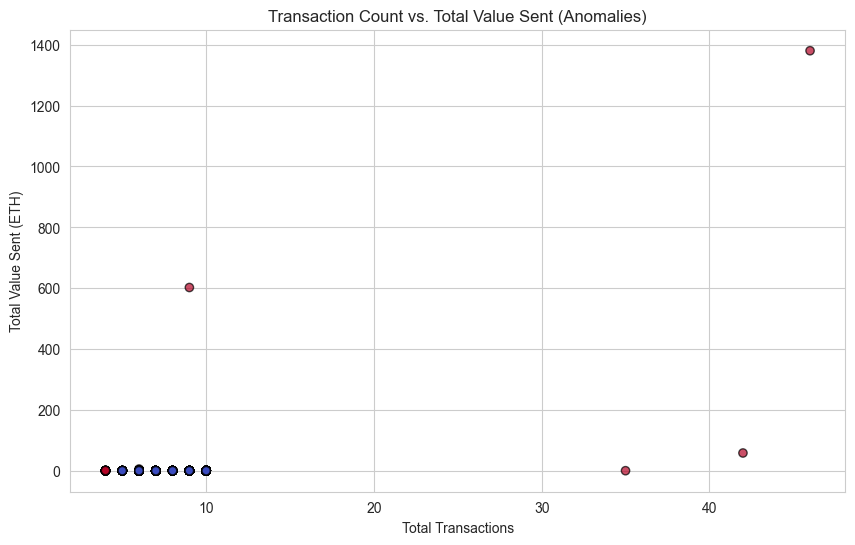

In [16]:
flagged = df_wash_trading_clustered['anomaly_score'] == -1
x_axis = df_wash_trading_clustered['total_transactions']
y_axis = df_wash_trading_clustered['total_sent']

plots.transaction_outlier_plot(flagged_data=flagged,
                               x_axis=x_axis,
                               y_axis=y_axis)

Clearly those really high value transactions are outliers so lets shrink our plot down a bit to get a look at those smaller transactions

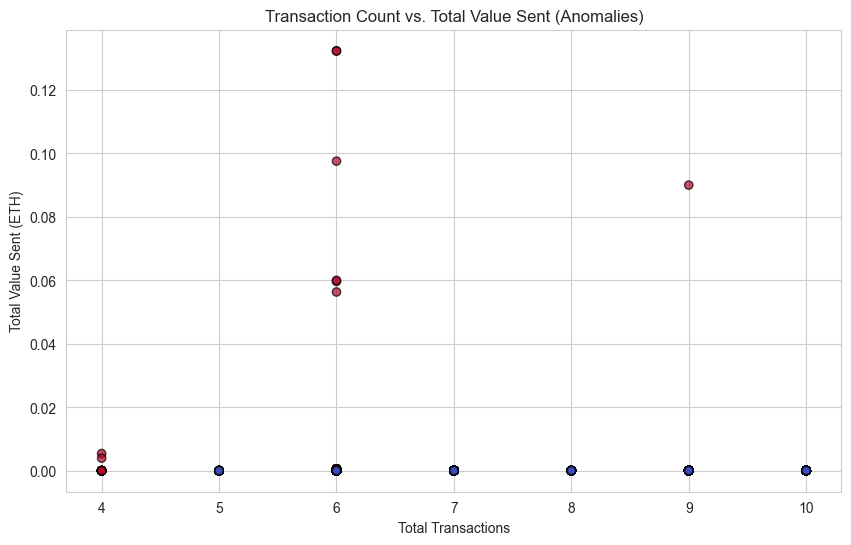

In [28]:
mask = (df_wash_trading_clustered['total_transactions'] < 15) & (df_wash_trading_clustered['total_sent'] < .5)

flagged = df_wash_trading_clustered[mask]['anomaly_score'] == -1
x_axis = df_wash_trading_clustered[mask]['total_transactions']
y_axis = df_wash_trading_clustered[mask]['total_sent']

plots.transaction_outlier_plot(flagged_data=flagged,
                               x_axis=x_axis,
                               y_axis=y_axis)